# 04 — Decision Boundary Visualization 🎨

Részletes vizualizáció: **heatmap-szerű decision boundary-k** különböző algoritmusokkal.

⚠️ **Figyelem**: Számításigényes! Nagy adathalmazon lassú lehet (mesh grid predict).

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from src.datasets import make_all_datasets
from src.visualization import decision_boundary_plot, compare_algorithms_grid, pca_scatter
from src.evaluation import evaluate, format_metrics

## 1. Adatkészletek Betöltése

In [2]:
datasets = make_all_datasets()
X_blobs, y_blobs, k_blobs = datasets["blobs"]
X_moons, y_moons, k_moons = datasets["moons"]
X_circles, y_circles, k_circles = datasets["circles"]

print(f"Blobs: {X_blobs.shape}, true k={k_blobs}")
print(f"Moons: {X_moons.shape}, true k={k_moons}")
print(f"Circles: {X_circles.shape}, true k={k_circles}")

Blobs: (800, 2), true k=4
Moons: (800, 2), true k=2
Circles: (800, 2), true k=2


## 2. K-Means Decision Boundary (Blobs)

Gömbszerű klaszterek → **K-Means jól működik** ✅

K-Means (blobs): sil=0.756, db=0.339, ch=5938, ari=0.997, nmi=0.994, homo=0.994, compl=0.994, v_meas=0.994, ami=0.994


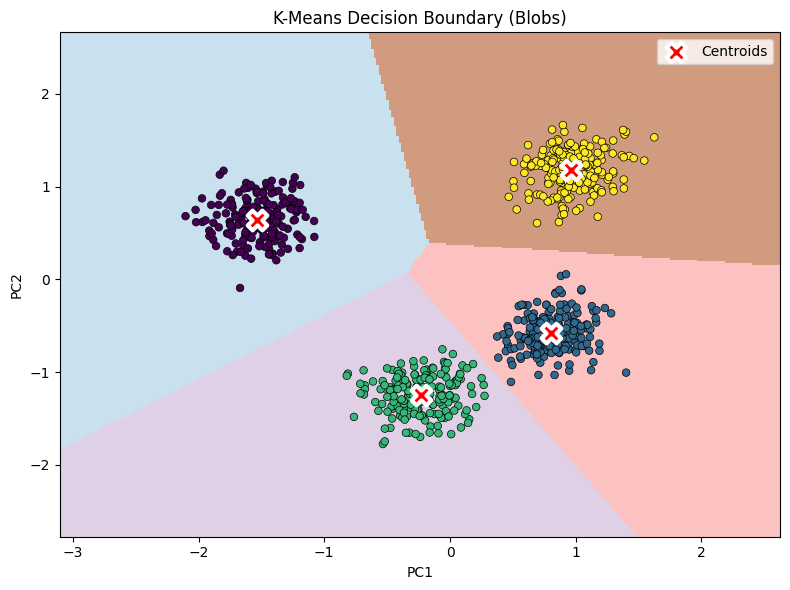

In [3]:
# PCA redukció 2D-re (blobs már 2D, de a pipeline konzisztencia miatt)
X_scaled = StandardScaler().fit_transform(X_blobs)
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

# K-Means tanítása 2D adaton
kmeans_blobs = KMeans(n_clusters=4, n_init="auto", random_state=42)
kmeans_blobs.fit(X_pca)

# Metrikák
m = evaluate(X_pca, kmeans_blobs.labels_, y_true=y_blobs)
print(f"K-Means (blobs): {format_metrics(m)}")

# Decision boundary (h=0.02 → részletes, de lassabb)
decision_boundary_plot(X_blobs, kmeans_blobs, "K-Means Decision Boundary (Blobs)", h=0.02)

## 3. K-Means vs K-Medoids (Blobs)

K-Medoids (blobs): sil=0.581, db=0.788, ch=1713, ari=0.630, nmi=0.801, homo=0.750, compl=0.859, v_meas=0.801, ami=0.800


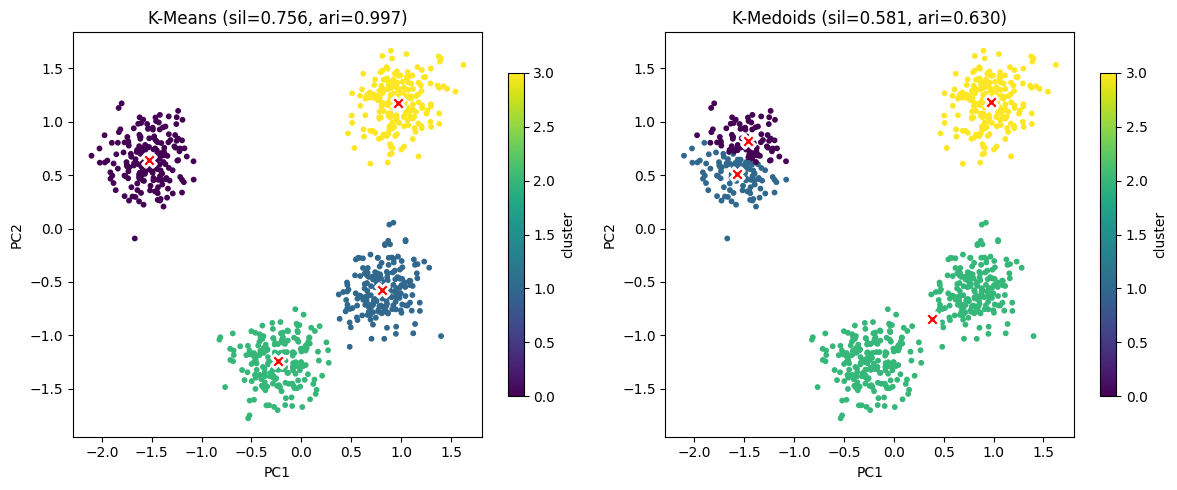

In [4]:
# K-Medoids
kmedoids_blobs = KMedoids(n_clusters=4, random_state=42)
kmedoids_blobs.fit(X_pca)

m_kmd = evaluate(X_pca, kmedoids_blobs.labels_, y_true=y_blobs)
print(f"K-Medoids (blobs): {format_metrics(m_kmd)}")

# Összehasonlítás subplot grid-ben
compare_algorithms_grid(
    X_blobs,
    [
        (kmeans_blobs.labels_, kmeans_blobs.cluster_centers_),
        (kmedoids_blobs.labels_, kmedoids_blobs.cluster_centers_),
    ],
    [
        f"K-Means (sil={m['sil']:.3f}, ari={m['ari']:.3f})",
        f"K-Medoids (sil={m_kmd['sil']:.3f}, ari={m_kmd['ari']:.3f})"
    ],
    n_cols=2
)

## 4. K-Means on Moons (Rossz Illeszkedés ❌)

Félhold alakzat → **K-Means kudarcot vall** (nem gömbszerű)

K-Means (moons): sil=0.494, db=0.811, ch=1112, ari=0.465, nmi=0.369, homo=0.369, compl=0.369, v_meas=0.369, ami=0.368
⚠️ Alacsony ARI/Silhouette → K-Means nem jó választás!


/Users/adombence/Projects/clustering-playground/src/visualization.py:135: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adombence/Projects/clustering-playground/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


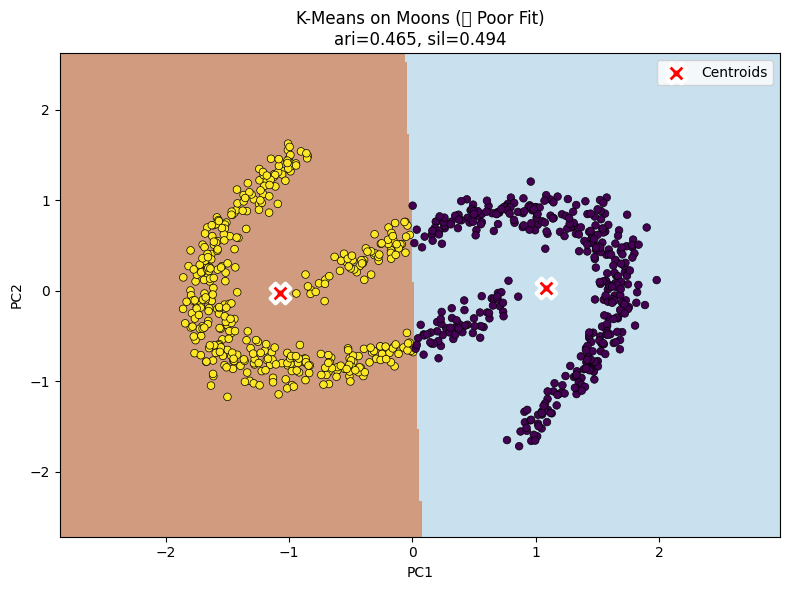

In [5]:
X_moons_scaled = StandardScaler().fit_transform(X_moons)
X_moons_pca = PCA(n_components=2, random_state=42).fit_transform(X_moons_scaled)

kmeans_moons = KMeans(n_clusters=2, n_init="auto", random_state=42)
kmeans_moons.fit(X_moons_pca)

m_moons = evaluate(X_moons_pca, kmeans_moons.labels_, y_true=y_moons)
print(f"K-Means (moons): {format_metrics(m_moons)}")
print("⚠️ Alacsony ARI/Silhouette → K-Means nem jó választás!")

decision_boundary_plot(
    X_moons, 
    kmeans_moons, 
    f"K-Means on Moons (❌ Poor Fit)\nari={m_moons['ari']:.3f}, sil={m_moons['sil']:.3f}", 
    h=0.02
)

## 5. K-Means on Circles (Még Rosszabb ❌❌)

Koncentrikus körök → **K-Means totálisan sikertelen**

K-Means (circles): sil=0.353, db=1.187, ch=457, ari=-0.001, nmi=0.000, homo=0.000, compl=0.000, v_meas=0.000, ami=-0.001
⚠️ Negatív/alacsony metrikák → totális kudarc!


/Users/adombence/Projects/clustering-playground/src/visualization.py:135: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adombence/Projects/clustering-playground/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


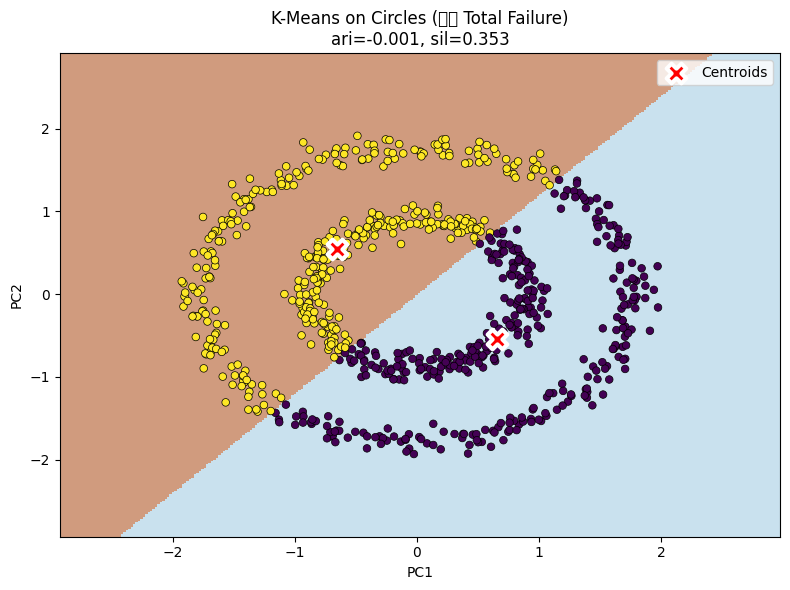

In [6]:
X_circles_scaled = StandardScaler().fit_transform(X_circles)
X_circles_pca = PCA(n_components=2, random_state=42).fit_transform(X_circles_scaled)

kmeans_circles = KMeans(n_clusters=2, n_init="auto", random_state=42)
kmeans_circles.fit(X_circles_pca)

m_circles = evaluate(X_circles_pca, kmeans_circles.labels_, y_true=y_circles)
print(f"K-Means (circles): {format_metrics(m_circles)}")
print("⚠️ Negatív/alacsony metrikák → totális kudarc!")

decision_boundary_plot(
    X_circles, 
    kmeans_circles, 
    f"K-Means on Circles (❌❌ Total Failure)\nari={m_circles['ari']:.3f}, sil={m_circles['sil']:.3f}", 
    h=0.02
)

## 6. Összehasonlítás: Mind a 3 Dataset

/var/folders/93/1knk744d5kg5kzm298yjzpkh0000gn/T/ipykernel_36533/3015947768.py:22: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/93/1knk744d5kg5kzm298yjzpkh0000gn/T/ipykernel_36533/3015947768.py:22: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adombence/Projects/clustering-playground/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adombence/Projects/clustering-playground/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


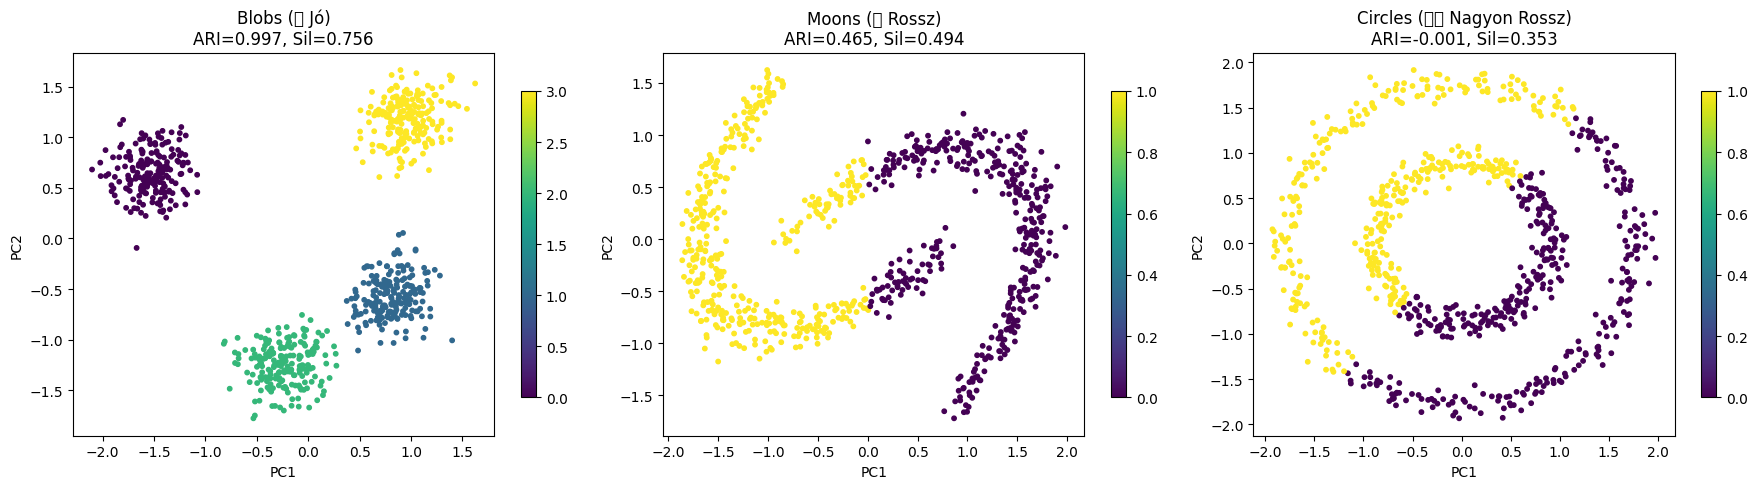

In [7]:
# Standard scatter plot összehasonlítás (gyorsabb, áttekinthetőbb)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets_list = [
    (X_blobs, kmeans_blobs.labels_, "Blobs (✅ Jó)", m),
    (X_moons, kmeans_moons.labels_, "Moons (❌ Rossz)", m_moons),
    (X_circles, kmeans_circles.labels_, "Circles (❌❌ Nagyon Rossz)", m_circles)
]

for ax, (X, labels, title, metrics) in zip(axes, datasets_list):
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
    
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=labels, cmap="viridis")
    ax.set_title(f"{title}\nARI={metrics['ari']:.3f}, Sil={metrics['sil']:.3f}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    plt.colorbar(scatter, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()

## 7. Következtetések 🎓

### K-Means Erősségei ✅
- **Gömbszerű klaszterek** (blobs)
- **Jól elkülöníthető** csoportok
- **Hasonló méretű** klaszterek

### K-Means Gyengeségei ❌
- **Nem-konvex alakzatok** (moons, circles)
- **Átfedő** klaszterek
- **Változó sűrűség** (DBSCAN jobb)

### Decision Boundary Előnyei 🎨
- **Vizuálisan látható**: Hol húzza meg az algoritmus a határokat
- **Intuitív**: Könnyebb megérteni a hibákat
- **Debuggolás**: Paraméter tuning vizuális támogatása

### Hátrányok ⚠️
- **Számításigényes**: Mesh grid predict lassú
- **Csak 2D**: Magasabb dimenzióban nem működik
- **PCA torzítás**: Információvesztés a redukció során

## 8. Házi Feladat 🏠

1. Próbáld ki **DBSCAN**-t a `moons` és `circles` dataseteken!
2. Változtasd a `h` paramétert (0.01, 0.05, 0.1) és figyeld meg a különbséget!
3. Használd az **iris** datasetet és vizualizáld 3 klaszterrel!